In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import re
import matplotlib as mpl
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt


mpl.rcParams['ps.useafm'] = True
#mpl.rcParams['pdf.use14corefonts'] = True
mpl.rcParams['text.usetex'] = True
mpl.rc('text', usetex=True) 
mpl.rcParams['text.latex.unicode']=True
mpl.use( "cairo", warn=False, force=True)
print(mpl.pyplot.get_backend())

mpl.rcParams['text.latex.preamble'] = [
       r'\usepackage{siunitx}',   # i need upright \micro symbols, but you need...
       r'\sisetup{detect-all}',   # ...this to force siunitx to actually use your fonts
       r'\usepackage[T1]{fontenc}',
       r'\usepackage[default]{gillius}',    # set the normal font here
       r'\usepackage{sansmath}',  # load up the sansmath so that math -> helvet
       r'\sansmath'               # <- tricky! -- gotta actually tell tex to use!
]  


def init_plotting():
    plt.rcParams['figure.figsize'] = (8, 5)
    plt.rcParams['font.size'] = 20
    print(plt.rcParams['font.family'] )
    plt.rcParams['axes.labelsize'] = plt.rcParams['font.size']
    plt.rcParams['axes.titlesize'] = plt.rcParams['font.size']
    plt.rcParams['legend.fontsize'] = 0.9*plt.rcParams['font.size']
    plt.rcParams['xtick.labelsize'] = plt.rcParams['font.size']
    plt.rcParams['ytick.labelsize'] = plt.rcParams['font.size']
#    print(plt.rcParams['savefig.dpi'])
#    plt.rcParams['savefig.dpi'] = 2*plt.rcParams['savefig.dpi']
    plt.rcParams['xtick.minor.visible']=False
    plt.rcParams['ytick.minor.visible']=False
    plt.rcParams['xtick.major.size'] = 6
    plt.rcParams['xtick.minor.size'] = 3
    plt.rcParams['xtick.major.width'] = 2
    plt.rcParams['xtick.minor.width'] = 2
    plt.rcParams['ytick.major.size'] = 6
    plt.rcParams['ytick.minor.size'] = 3
    plt.rcParams['ytick.major.width'] = 2
    plt.rcParams['ytick.minor.width'] = 2
    plt.rcParams['ytick.color'] = "black"#"#808080"
    plt.rcParams['xtick.color'] = "black"#"#808080"
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    #ax.tick_params(direction='out', length=6, width=2, colors='r',
    #           grid_color='r', grid_alpha=0.5)
    plt.rcParams['legend.frameon'] = False
    plt.rcParams['legend.loc'] = 'best'
    plt.rcParams['axes.linewidth'] = 2

init_plotting()



def hide_spines():
    """Hides the top and rightmost axis spines from view for all active
    figures and their respective axes."""
    # Retrieve a list of all current figures.
    figures = [x for x in mpl._pylab_helpers.Gcf.get_all_fig_managers()]
    for figure in figures:
        # Get all Axis instances related to the figure.
        for ax in figure.canvas.figure.get_axes():
            
            ax.spines['left'].set_color("#808080")
            ax.spines['bottom'].set_color("#808080")
            ax.spines['right'].set_color("#808080")
            ax.spines['top'].set_color("#808080")
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')
    
            ax.spines['top'].set_linewidth(0.1)
            ax.spines['top'].set_linestyle(':')
            ax.spines['right'].set_linewidth(0.1)
            ax.spines['right'].set_linestyle(':')


hide_spines()




cairo
['sans-serif']


/home/rmlans/anaconda3/envs/deephyper_env/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  app.launch_new_instance()


In [2]:
current_palette = sns.color_palette()

In [3]:
import numpy as np
import tensorflow as tf
from sklearn.externals import joblib
# Fixing paths
import os, sys
HERE = os.getcwd()
PARENT = os.path.dirname(os.getcwd())
sys.path.insert(0,HERE)

def load_graph(frozen_graph_filename):
    # We load the protobuf file from the disk and parse it to retrieve the 
    # unserialized graph_def
    with tf.gfile.GFile(frozen_graph_filename, "rb") as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())

    # Then, we import the graph_def into a new Graph and returns it 
    with tf.Graph().as_default() as graph:
        # The name var will prefix every op/nodes in your graph
        # Since we load everything in a new graph, this is not needed
        tf.import_graph_def(graph_def, name="prefix")
    return graph

/home/rmlans/anaconda3/envs/deephyper_env/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [4]:
print('Training assessment file')
num_inputs = 9

# Load data
total_data = np.load('Total_Data.npy')
true_op = np.copy(total_data[:,num_inputs:])
# We use our "load_graph" function
graph = load_graph('ML_LES.pb')
# We access the input and output nodes 
x = graph.get_tensor_by_name('prefix/input_placeholder:0')
y = graph.get_tensor_by_name('prefix/output_value/BiasAdd:0')

# Scale features
scaler_filename = "mv_scaler.save"
scaler = joblib.load(scaler_filename)
print(scaler.mean_)
print(scaler.var_)

total_data[:,:] = scaler.transform(total_data[:,:])
true_transformed = np.copy(total_data[:,num_inputs:])

# We launch a Session
with tf.Session(graph=graph) as sess:
    # Note: we don't nee to initialize/restore anything
    # There is no Variables in this graph, only hardcoded constants 
    y_out = sess.run(y, feed_dict={
        x: total_data[:,:num_inputs]
    })

# # Scatter plot 
# Rescale y_out to be in physical domain
total_data[:,num_inputs:] = y_out[:,:]
total_data[:,:] = scaler.inverse_transform(total_data[:,:])

Training assessment file
[ 4.94865469e-05 -1.41684594e-03  1.69580440e-04 -4.90923421e-05
  7.20095638e-04 -3.94933115e-07  1.15554821e-01 -1.44793630e-05
 -1.24957720e-05  4.99184369e-03]
[2.65928758e-03 2.00441393e-01 5.63154238e-03 3.41071339e-03
 7.02455952e-03 3.57256750e-03 1.47767332e-03 2.58190241e-05
 5.36042830e-05 1.34053104e-04]


In [5]:
x=total_data[:,-1].flatten()
y=true_op[:,0].flatten()

['sans-serif']


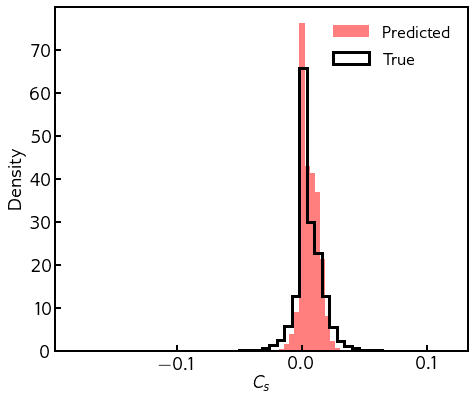

In [12]:
plt.figure(figsize=(7,6))
sns.distplot(x,kde=False,color="red",label='Predicted',hist_kws=dict(alpha=0.5),norm_hist=True)
sns.distplot(y,kde=False,color="black",label='True',hist_kws=dict(histtype="step",alpha=1.0,linewidth=3),norm_hist=True)
plt.legend(frameon=False)
plt.xlabel(r"$C_s$")
plt.ylabel("Density")
init_plotting()
plt.tight_layout()

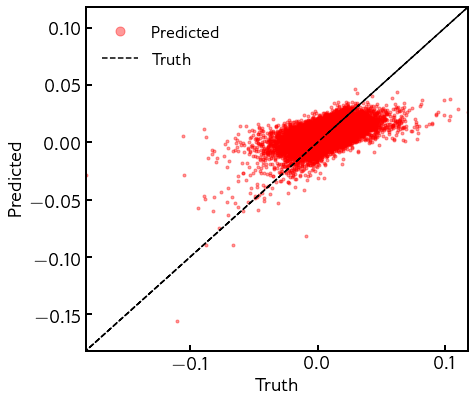

In [9]:
# Scatter plot 
plt.figure(figsize=(7,6))
# plt.scatter(true_op[:,0].flatten(),total_data[:,-1].flatten(),label='ML',c=wall_distance,cmap=cm.YlOrBr,alpha=0.5)
plt.plot(true_op[:,0].flatten(),total_data[:,-1].flatten(),'ro',label='Predicted',markersize=3,alpha=0.4)
plt.plot(true_op[:,0].flatten(),true_op[:,0].flatten(),'k-',linestyle='--',label='Truth') # identity line
plt.xlabel('Truth')
plt.ylabel('Predicted')
lgnd = plt.legend(markerscale=3)
plt.tight_layout()


plt.xlim((true_op[:,0].min(),true_op[:,0].max()))
plt.ylim((true_op[:,0].min(),true_op[:,0].max()))
plt.show()

In [10]:
training_data = np.loadtxt('training.log',skiprows=1,delimiter=',')

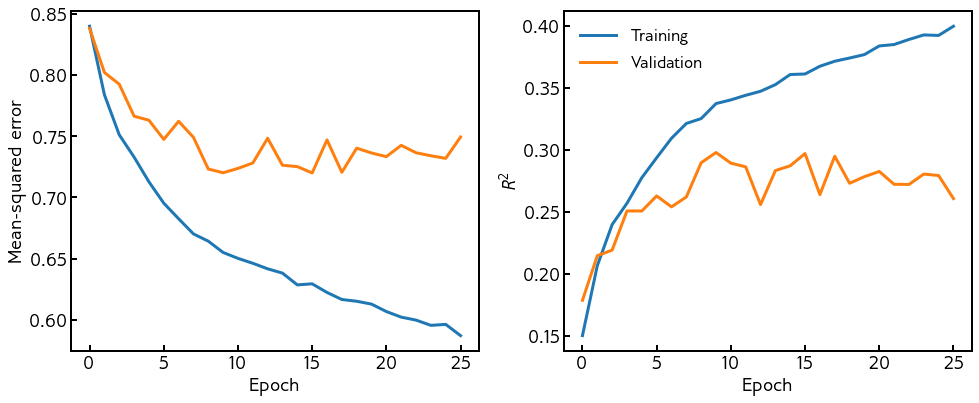

In [11]:
fig, ax = plt.subplots(figsize=(14,6),nrows=1,ncols=2)
ax[0].plot(training_data[:,0],training_data[:,1],label='Training',linewidth=3)
ax[0].plot(training_data[:,0],training_data[:,3],label='Validation',linewidth=3)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Mean-squared error')

ax[1].plot(training_data[:,0],training_data[:,2],label='Training',linewidth=3)
ax[1].plot(training_data[:,0],training_data[:,4],label='Validation',linewidth=3)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('$R^2$')

plt.tight_layout()
plt.legend()
plt.show()